# GCE Lab 3 - Constrain Galaxy Model

This notebook presents how to plot the basic galaxy evolution properties of your simple Milky Way model. Those plots will allow you to calibrate your model against several observations (taken from [Kubryk et al. 2015](http://adsabs.harvard.edu/abs/2015A%26A...580A.126K)).

In [1]:
# Import the standard Python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Two-zone galactic chemical evolution code
import JINAPyCEE.omega_plus as omega_plus

# Matplotlib option
%matplotlib inline

## Your Tasks

* Understand the impact of the star formation efficiency and the galactic inflow rate on the general properties of your Milky Way model.
* **Find a set of input parameters that reproduce the observational constraints**.

### Key Equation for Star Formation

The global star formation rate ($\dot{M}_\star$) inside the galaxy model at time $t$ depends on the mass of gas $M_{gas}$ inside the galaxy and the star formation efficiency $f_\star$ [yr$^{-1}$].

$$\dot{M}_\star(t)=f_\star M_\mathrm{gas}(t)\quad\mbox{[M$_\odot$ yr$^{-1}$]}$$

## 1. Run GCE Model

In the following example, you will be using a galactic inflow prescription that is similar to the two-infall model presented in [Chiappini et al. (1997)](http://adsabs.harvard.edu/abs/1997ApJ...477..765C).

In [2]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Star formation efficiency (f_\star) --> [dimensionless]
# Original value in the notebook --> 1e-11
sfe = 1e-11

# Magnitude (strength) of the galactic inflow rate
# Original value in the notebook --> 0.1
in_mag = 0.1

# ====================================
# ////////// Modify above ////////////

# Run OMEGA+ with the first set of parameters
op = omega_plus.omega_plus(sfe=sfe, special_timesteps=200, t_star=1.0, \
                           exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]])

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.49s
   OMEGA+ run completed - Run time: 3.07s


## 2. Plot the Star Formation History

The current star formation rate (SFR) is about 2 M$_\odot$ yr$^{-1}$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** With a higher star formation efficiency, the gas reservoir will be converted into stars more rapidly.

**Useful Information:** The magnitude of the star formation rate is very sensitive to the galactic inflow rate.

Integrated stellar mass: 6.17e+08 M_sun
.. Should between 3.00e+10 and 5.00e+10 M_sun


<Figure size 864x504 with 0 Axes>

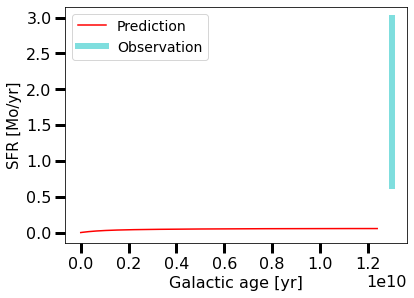

In [3]:
# Set the figure size
fig = plt.figure(figsize=(12,7))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot the evolution of the star formation rate (SFR)
op.inner.plot_star_formation_rate(color='r', marker=' ', label="Prediction")

# Plot the observational constraint (cyan color)
plt.plot([13e9,13e9], [0.65,3.0], linewidth=6, color='c', alpha=0.5, label="Observation")

# Labels and legend
plt.xlabel('Galactic age [yr]', fontsize=16)
plt.legend()

# Print the total stellar mass formed
print("Integrated stellar mass:",'%.2e'%sum(op.inner.history.m_locked),'M_sun')
print(".. Should between 3.00e+10 and 5.00e+10 M_sun")

## 3. Plot the Evolution of the Mass of Gas

The current total mass of gas in the Milky Way is about $7\times10^{9}$ M$_\odot$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** The mass of gas depends strongly on the galactic inflow rate.

<Figure size 864x504 with 0 Axes>

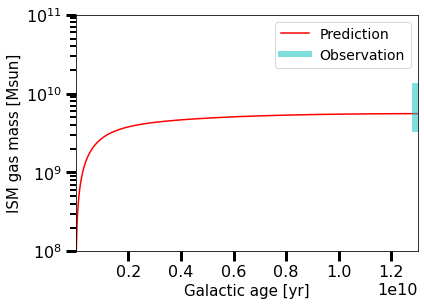

In [4]:
# Set the figure size
fig = plt.figure(figsize=(12,7))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot the evolution of the mass of gas in the interstellar medium (ISM)
op.inner.plot_totmasses(color='r', marker=' ', label="Prediction")

# Plot the observational constraint
plt.plot([12.9e9,12.9e9], [3.6e9,12.6e9], linewidth=6, color='c', alpha=0.5, label="Observation")

# Labels and legend
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')
plt.ylim(1e8,1e11)
plt.legend()

## 4. Plot the Evolution of Iron Abundance [Fe/H]

$[A/B]=\log(n_A/n_B)-\log(n_A/n_B)_\odot$

To represent the solar neighbourhood, [Fe/H] in your model should reach zero (solar value) about 4.6 Gyr before the end of the simulation, representing the moment the Sun formed.

**Useful Information:** The [Fe/H] is mostly sensitive to the star formation efficiency. In other words, it is sensitive to the mass of gas (H) in which stars inject their metals (Fe).

<Figure size 864x504 with 0 Axes>

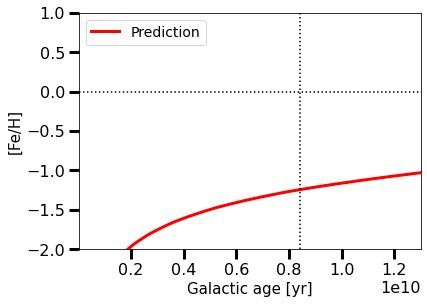

In [5]:
# Set the figure size
fig = plt.figure(figsize=(12,7.0))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot the evolution of [Fe/H], the iron abundance of the gas inside the galaxy
op.inner.plot_spectro(color='r', marker=" ", label="Prediction")

# Plot the solar value (black dotted lines)
t_Sun = 13.0e9 - 4.6e9
plt.plot([t_Sun,t_Sun], [-2,1], ':k')
plt.plot([0,13e9], [0,0], ':k')

# Labels and legend
plt.ylim(-2,1)
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')
plt.legend()

## 5. Plot the Evolution of the Galactic Inflow Rate

The current galactic inflow rate estimated for the Milky Way is about 1 M$_\odot$ yr$^{-1}$.

<Figure size 720x432 with 0 Axes>

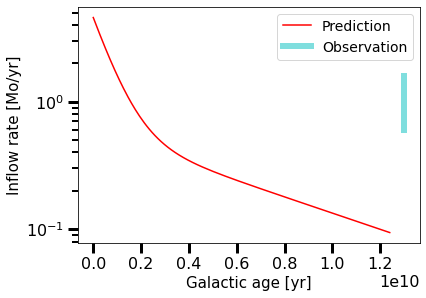

In [6]:
# Set the figure size
fig = plt.figure(figsize=(10,6.0))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot the evolution of the inflow rate
op.inner.plot_inflow_rate(color='r', marker=" ", label="Prediction")

# Plot the observational constraint
plt.plot([13e9,13e9], [0.6,1.6], linewidth=6, color='c', alpha=0.5, label="Observation")

# Labels and legend
plt.yscale('log')
plt.xlabel('Galactic age [yr]')
plt.legend()